# Joins

____

+ Types of Joins
+ Duplicates in Joins
+ Joining on multiple fields
+ Vets Clinic Data Analytics
+ Upload Data
+ First Left Outer Join
+ Joins Tips and Tricks
+ Inner Join
+ Full Outer Join
+ Joining on Multiple Fields
+ Complex Joins
+ Cleanng up your Join
+ Cross Join

## Types of Joins
____

Operations performed on table in relational database

Here is the essence of the topic: Very simple. Damn where was I...nowhere


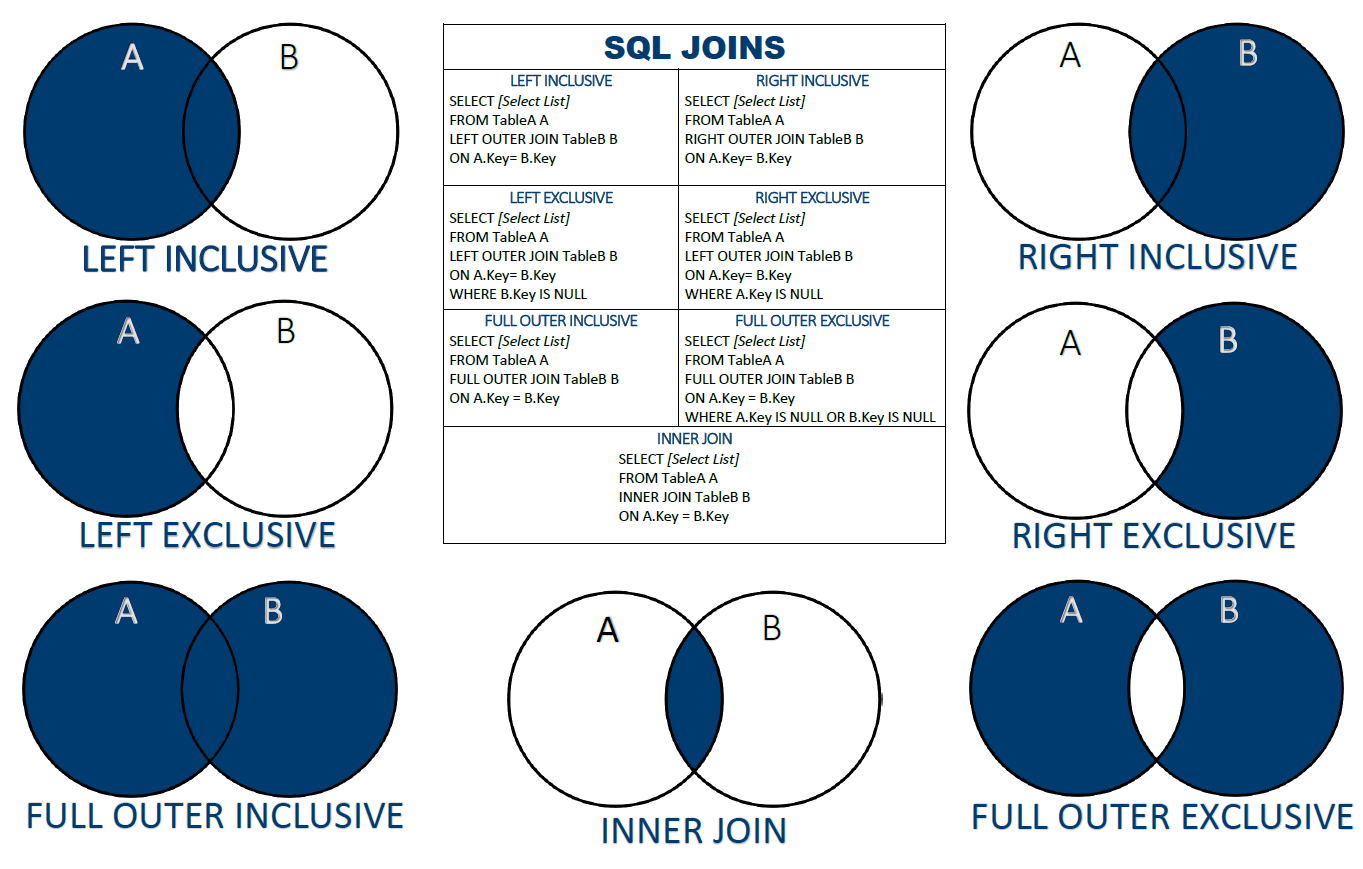


Keeping the notes short at beginning. The diagram will make more sense when the code is written.


1. Inner Join

Here we only look at the INTERSECT, that which is eqaul to each other. Returns records that have matching values in both tables.



2. Left Outer Join

Here the primary table is the one of the left.Returns all records from the left table, and the matched records from the right table. That is rows (non matching records) are discarded from non-primary table (right table)



3. Right Outer Join

Here the primary table is the one of the right.Returns all records from the right table, and the matched records from the left table. That is rows (non matching records) are discarded from non-primary table (left table)


4. Full Outer Join

Here we only look at the UNION. Returns all records when there is a match in either left or right table. This may confusing. It return ALL record of LEFT and RIGHT, and matches up those ones that match. So it does a MERGE/UNION, but also gives us a 'merge of matched records' which is the key here.


## Duplicates in Joins
____

What happens when we do joins, and one of tables have duplicate values in one of them.

```
Table A:
OrderNo     Region       Status
---------   ----------   -------- 
001         North        Unpaid
002         North        Unpaid
003         North        Paid
004         North        Paid
```

```
Table B:
OrderNo     Item         Sales
---------   ----------   -------- 
001         Chair        R97  
001         Desk         R123
002         Stapler      R8
003         Pen          R3
003         Pencil       R1
003         Eraser       R1

```

Table B is itemised orders. Then need to match the status with order item.

1. We use and INNER Join


For Order No: 001
    + There are 2 matches in Table B

For Order No: 002
    + There is 1 match in Table B

For Order No: 003
    + There are 3 matches in Table B
    

So where there are more than one match (per order No) the rows are duplicated.


So the final table will look like this.


```
Table B:
OrderNo     Region       Status    OrderNo      Item     Sales
---------   ----------   --------  ----------   -------- -------- 
001         North        Unpaid    001          Chair        R97  
001         North        Unpaid    001          Desk         R123
002         North        Unpaid    002          Stapler      R8
003         North        Paid      003          Pen          R3
003         North        Paid      003          Pencil       R1
003         North        Paid      003          Eraser       R1

```
Rows on table of left (Table A)  is duplicated by rows on Table on Right (Table B)

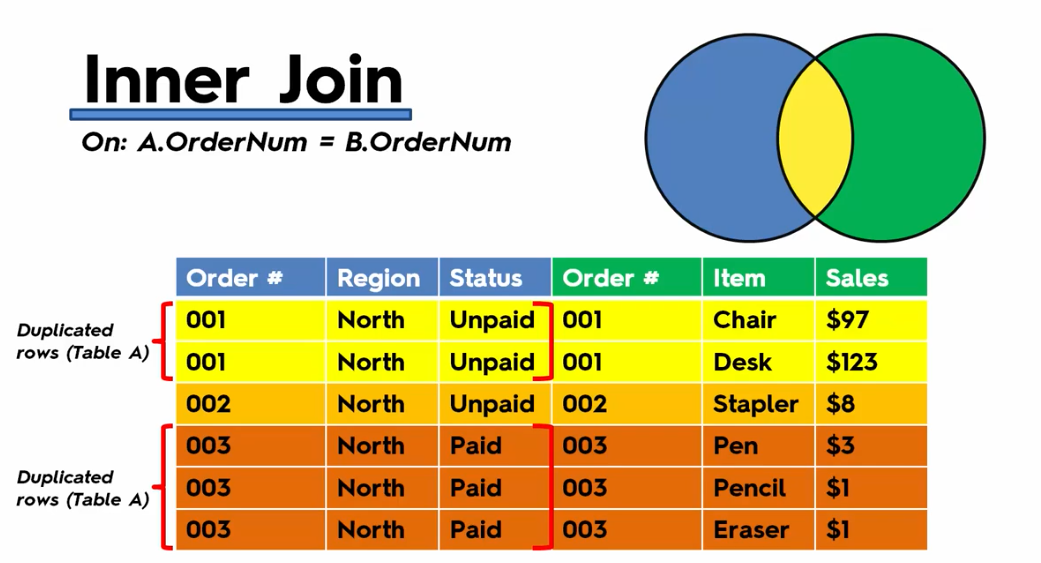

## Joining on multiple fields

___


Here we will see why its necessary to join on multiple fields, and what happens when you forget to do it.

We have the following two tables:


```
Table A:
Store       OrderNo      Customer
---------   ----------   -------- 
North       001          Mike
North       002          Jack
South       001          Susan
```

```
Table B:
Store       OrderNo       Item         Sales
---------   ----------   --------     --------
North       001          Laptop        R999  
North       001          Mouse         R49
North       002          Monitor       R155
South       001          Camera        R97
```

We need to find the total sales of each individual customers.


1. Doing a Left Join

That means all of Table A, and only matching of Table B.
And only using one field, that is OrderNo

For Order No: 001 (from North)
    + There are 3 matches in Table B
    
    And we can see this is already incorrect. We matching orderno 001 with both North and South store.
    
For Order No: 002
    + There is 1 match in Table B

For Order No: 001 (from South)
    + There are 3 matches in Table B
    
    This is incorrect. We matching orderno 001 with both North and South store.
    
And this is how the result table will look like:

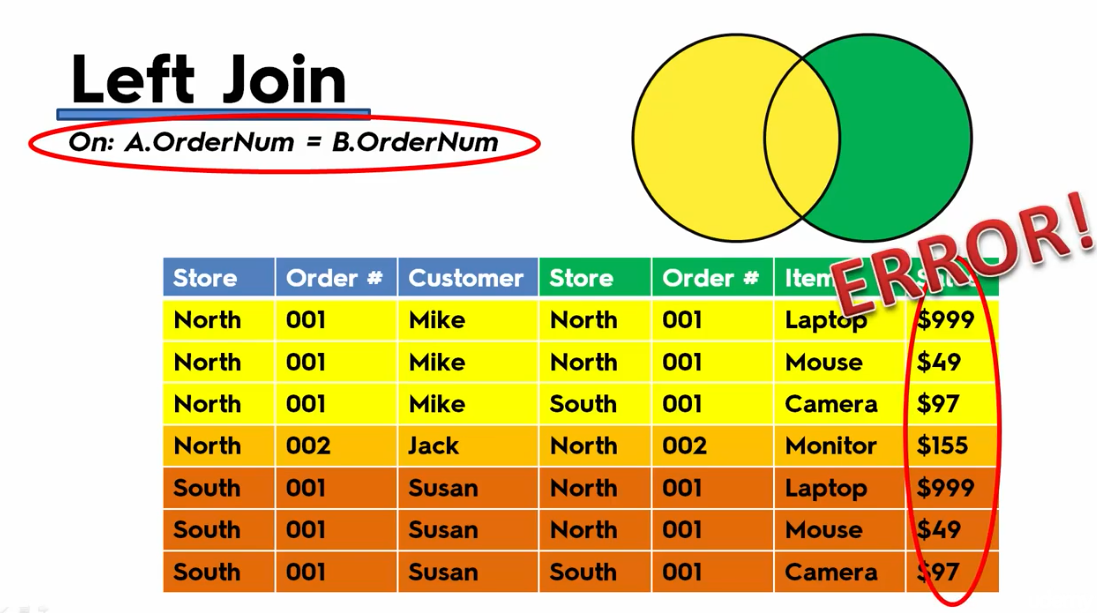

Our sales are higly inflated: We did not selll two laptops,etc.

So we cannot join on a single field.



To get the correct result: We need to join on OrderNo and Store.
Meaning the orderNo is unique for each store.

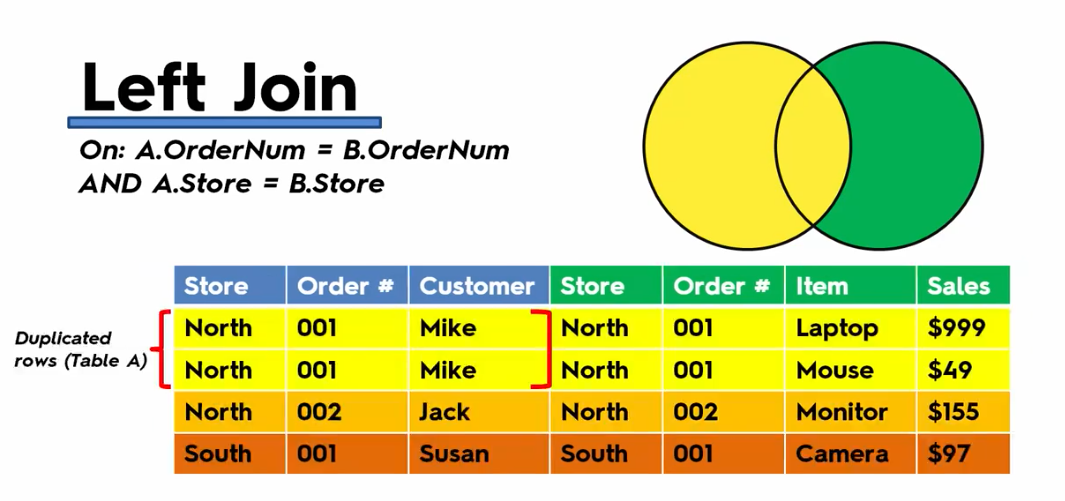

##  Vets Clinic Data Analytics

____

Here we have a challenge with different data sets.


## Upload Data

____

Create a pets database. We rather use postgress DB, as it was setup through command line.
Upload datasets


In [1]:
import psycopg2

In [2]:
connection = psycopg2.connect(user = "postgres",
                                  password = "9300273",
                                  host = "127.0.0.1",
                                  port = "5432",
                                  database = "postgres")
cursor = connection.cursor()

In [3]:
drop_table_query = "DROP TABLE IF EXISTS pets;"
    
cursor.execute(drop_table_query)
connection.commit()
print("Table dropped successfully ")

Table dropped successfully 


In [4]:
drop_table_query = "DROP TABLE IF EXISTS owners;"
    
cursor.execute(drop_table_query)
connection.commit()
print("Table dropped successfully ")

Table dropped successfully 


In [5]:
drop_table_query = "DROP TABLE IF EXISTS proceduredetails;"
    
cursor.execute(drop_table_query)
connection.commit()
print("Table dropped successfully ")

Table dropped successfully 


In [6]:
drop_table_query = "DROP TABLE IF EXISTS procedurehistory;"
    
cursor.execute(drop_table_query)
connection.commit()
print("Table dropped successfully ")

Table dropped successfully 


In [7]:
create_table_query = '''CREATE TABLE pets (
    petid varchar, 
    name varchar,
    kind varchar,
    gender varchar,
    age int,
    ownerid varchar);'''
    
cursor.execute(create_table_query)
connection.commit()
print("Table created successfully in PostgreSQL ")

Table created successfully in PostgreSQL 


In [8]:
create_table_query = '''CREATE TABLE owners (
    ownerid varchar,
    name varchar,
    surname varchar,
    streetaddress varchar,
    city varchar,
    state varchar(2),
    statefull varchar,
    zipcode varchar);'''
    
cursor.execute(create_table_query)
connection.commit()
print("Table created successfully in PostgreSQL ")

Table created successfully in PostgreSQL 


In [9]:
create_table_query = '''CREATE TABLE proceduredetails (
    proceduretype varchar,
    proceduresubcode varchar,
    description varchar,
    price float);'''
    
cursor.execute(create_table_query)
connection.commit()
print("Table created successfully in PostgreSQL ")

Table created successfully in PostgreSQL 


In [10]:
create_table_query = '''CREATE TABLE procedurehistory (
    petid varchar,
    proceduredate date,
    proceduretype varchar,
    proceduresubcode varchar);'''
    
cursor.execute(create_table_query)
connection.commit()
print("Table created successfully in PostgreSQL ")

Table created successfully in PostgreSQL 


In [11]:
populate_table_query ="""COPY pets FROM 
      '/media/disk3/projects/Postgresql/Learn MS SQL and PostgreSQL/data/section7/P9-Pets.csv'  
      DELIMITER ',' CSV HEADER;"""    
cursor.execute(populate_table_query)
connection.commit()
print("Table populated in PostgreSQL ")

Table populated in PostgreSQL 


In [12]:
populate_table_query ="""COPY owners FROM 
      '/media/disk3/projects/Postgresql/Learn MS SQL and PostgreSQL/data/section7/P9-Owners.csv'  
      DELIMITER ',' CSV HEADER;"""    
cursor.execute(populate_table_query)
connection.commit()
print("Table populated in PostgreSQL ")

Table populated in PostgreSQL 


In [13]:
populate_table_query ="""COPY proceduredetails FROM 
      '/media/disk3/projects/Postgresql/Learn MS SQL and PostgreSQL/data/section7/P9-ProceduresDetails.csv'  
      DELIMITER ',' CSV HEADER;"""    
cursor.execute(populate_table_query)
connection.commit()
print("Table populated in PostgreSQL ")

Table populated in PostgreSQL 


In [14]:
populate_table_query ="""COPY procedurehistory FROM 
      '/media/disk3/projects/Postgresql/Learn MS SQL and PostgreSQL/data/section7/P9-ProceduresHistory.csv'  
      DELIMITER ',' CSV HEADER;"""    
cursor.execute(populate_table_query)
connection.commit()
print("Table populated in PostgreSQL ")

Table populated in PostgreSQL 


## First Left Outer Join

____


We nened to match the owner ID in Pets table with the correct onwer details.

In Onwer's Table onwerid is the primary key

We want to see:

- Pets details
- Owner details
- side by side in same view

We get these resuls by using LEFT outer join

So we want EVERTHING of pets (this is what we want) so this will be the LEFT side, and matching records of the owners tabvle

So table on the left will not loose any information.

This also implies that every single pet has an owner

```
SELECT * FROM public.pets
LEFT JOIN 
    /* then [name of second table]*/ public.owners
    /*then we specify how to join tables [which criteria]*/
ON pets.ownerid = owners.ownerid
ORDER BY owners.ownerid;

```

What is we want to select only certain fields from each table. How do we go about doing so?

We precede the column name with tablename

```
SELECT pets,name,owners.name FROM public.pets
LEFT JOIN 
     public.owners
ON pets.ownerid = owners.ownerid
ORDER BY owners.ownerid;
```



In [15]:
query ="""SELECT * FROM public.pets
LEFT JOIN public.owners
ON pets.ownerid = owners.ownerid
ORDER BY owners.ownerid LIMIT 10;"""    
cursor.execute(query)
rows = cursor.fetchall()
for row in rows:
    print(f"{row[0]} | {row[1]} | {row[2]}| {row[3]}| {row[4]}| {row[5]}| {row[6]}| {row[7]}| {row[8]}")


U8-6473 | Biscuit | Dog| female| 3| 1070| 1070| Jessica| Velazquez
T2-2142 | Stowe | Cat| female| 15| 1132| 1132| Rosa| Quarles
N7-6805 | Enyo | Cat| female| 12| 1202| 1202| Susan| Jackson
F2-3235 | Danger | Dog| male| 8| 1306| 1306| Benjamin| Spears
L2-1834 | Collette | Dog| female| 4| 1306| 1306| Benjamin| Spears
L4-4205 | Rumba | Cat| male| 5| 1312| 1312| Charles| Chidester
J2-3320 | Heisenberg | Dog| male| 3| 1319| 1319| Joe| Custer
J0-7893 | Crockett | Dog| male| 12| 1334| 1334| Jason| Cantwell
U6-4890 | Blackie | Dog| male| 6| 1546| 1546| Joseph| Blow
P9-6519 | Cookie | Cat| female| 6| 1653| 1653| Carolyn| Crane


## Joins Tips and Tricks
____

1. Aliases for Table
Table name infront of Column can get convoluted. We define a letter for Table
```
FROM pets as A
``` 

2. Aliases for Columns

```
A.name as petname, B.name as ownersname
```

Above we dont need to include 'AS';

```
FROM pets A
```

```
A.name petname, B.name ownersname
```

But 'AS' is recommended, for more readabiity


3. Why is RIGHT Join not separate topic

Right join is identical to LEFT join

1. Change LEFT to RIGHT Key word
2. Change the tables.

``` 
SELECT * FROM public.pets
RIGHT JOIN  public.owners
ON pets.ownerid = owners.ownerid
ORDER BY owners.ownerid;
```
Exactly the same information is returned.

In [16]:
query ="""SELECT * FROM public.pets
RIGHT JOIN  public.owners
ON pets.ownerid = owners.ownerid
ORDER BY owners.ownerid LIMIT 10;"""    
cursor.execute(query)
rows = cursor.fetchall()
for row in rows:
    print(f"{row[0]} | {row[1]} | {row[2]}| {row[3]}| {row[4]}| {row[5]}| {row[6]}| {row[7]}| {row[8]}")


U8-6473 | Biscuit | Dog| female| 3| 1070| 1070| Jessica| Velazquez
T2-2142 | Stowe | Cat| female| 15| 1132| 1132| Rosa| Quarles
N7-6805 | Enyo | Cat| female| 12| 1202| 1202| Susan| Jackson
L2-1834 | Collette | Dog| female| 4| 1306| 1306| Benjamin| Spears
F2-3235 | Danger | Dog| male| 8| 1306| 1306| Benjamin| Spears
L4-4205 | Rumba | Cat| male| 5| 1312| 1312| Charles| Chidester
J2-3320 | Heisenberg | Dog| male| 3| 1319| 1319| Joe| Custer
J0-7893 | Crockett | Dog| male| 12| 1334| 1334| Jason| Cantwell
U6-4890 | Blackie | Dog| male| 6| 1546| 1546| Joseph| Blow
P9-6519 | Cookie | Cat| female| 6| 1653| 1653| Carolyn| Crane


## Inner Join

___

Here we will be using the pets and procedurehistory data. Procedurehistory table is a global table, as the information is across all states, and a pet.


Whereas the pets and owners table is local to veterinary clinic.

That means that there are pets in the procedurehistory table, that are not in the pets table.

So, how do we find our pets (local) that have procedures done? What join do we need for that.

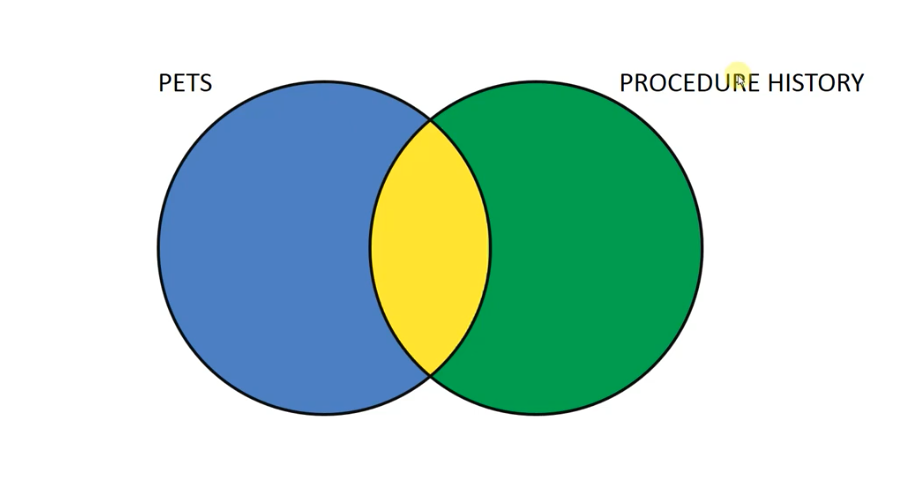


Will a Right Join work?

This means we will get ALL the procedure history data of all the pets thats not part of our clinic and intesect with pets.
 
This is wrong, we only want pets that part of our clinic.


Will a Left Join work?

This join will take all of pets, and intersection with procedure history (that means matching with pets). But we will get ALL pets, even pets that did not have pocedure done, so all on left is returned.

This is wrong. Remember we want out pets with a procedure.


Will a Inner Join work?

Now only get the intersect: that is pets with procedures done.
 
This is correct.


Remember where one table is missing a row, sql will duplicate a row, on left hand side table, see Bonaparte. This ia what we talked about in Theory of databases.


Here we get 41 rows

In [17]:
query ="""SELECT * FROM public.pets as A
INNER JOIN public.procedurehistory as B
ON A.petid =B.petid LIMIT 10;"""    
cursor.execute(query)
rows = cursor.fetchall()
for row in rows:
    print(f"{row[0]} | {row[1]} | {row[2]}| {row[3]}| {row[4]}| {row[5]}| {row[6]}| {row[7]}| {row[8]}| {row[9]}")

T0-3277 | Humbert | Cat| male| 12| 8133| T0-3277| 2016-01-22| VACCINATIONS| 05
G6-6501 | Jake | Cat| male| 2| 3089| G6-6501| 2016-01-29| VACCINATIONS| 05
P9-3625 | Cuddles | Dog| male| 14| 7579| P9-3625| 2016-01-30| ORTHOPEDIC| 07
F1-1855 | Bandit | Parrot| male| 2| 9604| F1-1855| 2016-02-02| VACCINATIONS| 05
S1-2243 | Cuddles | Dog| male| 2| 5447| S1-2243| 2016-02-04| VACCINATIONS| 05
L8-0046 | Rumba | Cat| male| 7| 9828| L8-0046| 2016-02-05| VACCINATIONS| 05
L4-6292 | Bright | Dog| male| 13| 3089| L4-6292| 2016-02-05| VACCINATIONS| 05
X0-8765 | Vuitton | Parrot| female| 11| 7581| X0-8765| 2016-03-18| VACCINATIONS| 05
J8-7429 | Bonaparte | Dog| male| 4| 8215| J8-7429| 2016-05-04| VACCINATIONS| 05
J8-7429 | Bonaparte | Dog| male| 4| 8215| J8-7429| 2016-05-08| VACCINATIONS| 05


## Full Outer Join

___

This join is a bit of a rare specie, and we wont find in the wild that ofte.

We know the most common Outer Join, will be the Left Outer Join. This is very similar to V-Lookup in Excel.


And Inner Join which trims away all the fat.

But Full Outer Join, dont trip anything at all. Its basically a MERGE

So SQL tries to match what is can during the 'MERGE', but all include everything else that it does not able to match.


```
SELECT * FROM public.pets as A
FULL OUTER JOIN public.procedurehistory as B
ON A.petid =B.petid

```

Sometimes this information will be helpful, when you do some kind of a analysis.

So graphically this will be 

```
pets                 procedurehistory 
----                 ----------------
NULL NULL NULL       data data data 
data data data       data data data 
data data data       NULL NULL NULL  

```

Here we get 2350 rows

So to ignore the nulls in pets we can do:



```
SELECT * FROM public.pets as A
FULL OUTER JOIN public.procedurehistory as B
ON A.petid =B.petid
WHERE A.petid IS NOT NULL
```
```
pets                 procedurehistory 
----                 ----------------
data data data       data data data 
data data data       NULL NULL NULL  

```


Here we get 107 rows



So to ignore the nulls in procedurehistory we can do:


```
SELECT * FROM public.pets as A
FULL OUTER JOIN public.procedurehistory as B
ON A.petid =B.petid
WHERE B.petid IS NOT NULL
```
```
pets                 procedurehistory 
----                 ----------------
NULL NULL NULL       data data data 
data data data       data data data 
```


Here we get 2284 rows

And to get back to inner join of 41 records:

```
SELECT * FROM public.pets as A
FULL OUTER JOIN public.procedurehistory as B
ON A.petid =B.petid
WHERE B.petid IS NOT NULL
AND A.petid IS NOT NULL
```

```
pets                 procedurehistory 
----                 ----------------
data data data       data data data 
```

In [18]:
query ="""SELECT * FROM public.pets as A
FULL OUTER JOIN public.procedurehistory as B
ON A.petid =B.petid LIMIT 100;"""    
cursor.execute(query)
rows = cursor.fetchall()
for row in rows:
    print(f"{row[0]} | {row[1]} | {row[2]}| {row[3]}| {row[4]}| {row[5]}| {row[6]}| {row[7]}| {row[8]}| {row[9]}")

None | None | None| None| None| None| A8-1181| 2016-01-10| VACCINATIONS| 05
None | None | None| None| None| None| E7-3766| 2016-01-11| VACCINATIONS| 05
None | None | None| None| None| None| B8-8740| 2016-01-11| VACCINATIONS| 05
None | None | None| None| None| None| D4-9443| 2016-01-11| VACCINATIONS| 05
None | None | None| None| None| None| F6-3398| 2016-01-12| HOSPITALIZATION| 01
None | None | None| None| None| None| E2-6642| 2016-01-12| VACCINATIONS| 05
None | None | None| None| None| None| A4-1165| 2016-01-12| VACCINATIONS| 05
None | None | None| None| None| None| F9-9345| 2016-01-12| VACCINATIONS| 05
None | None | None| None| None| None| F3-9375| 2016-01-12| VACCINATIONS| 05
None | None | None| None| None| None| F9-5311| 2016-01-12| GENERAL SURGERIES| 06
None | None | None| None| None| None| E0-7735| 2016-01-12| GENERAL SURGERIES| 03
None | None | None| None| None| None| D2-8905| 2016-01-13| VACCINATIONS| 05
None | None | None| None| None| None| E8-8379| 2016-01-13| VACCINATIONS| 05

## Joining on Multiple Fields

____

Here we joining the proceduredetails and procedurehistory table.

Here is the essence if we do not use multiple fields

```
Table: proceduredetails = 41 records
Table: procedurehistory = 2284 records
```
We know, LEFT JOIN, is many to one relationship, that is all of left table and only match on second table. We should not get more records:

```
SELECT * FROM public.procedurehistory as A
LEFT JOIN public.proceduredetails as B
ON A.proceduresubcode =B.proceduresubcode
```

The following is incorrect as we getting 8179 records. More records than both tables. we getting a many to many relationship

What are we missing? We need to join by another table

Procduresubscode is not a unique identifier, we need also Procduretype as well

```
SELECT * FROM public.procedurehistory as A
LEFT JOIN public.proceduredetails as B
ON A.proceduresubcode =B.proceduresubcode
AND A.proceduretype =B.proceduretype
```

Now we get 2284 records. Or better if we first place proceduretype...ust to keep oiut code clean:


```
SELECT * FROM public.procedurehistory as A
LEFT JOIN public.proceduredetails as B
ON A.proceduretype =B.proceduretype
AND A.proceduresubcode =B.proceduresubcode
```

## Complex Joins

____

Here we have two or multiple joins in a row in one statement.

We know or established which pets in our clinic had procedures done by matching the pets and procedurehistory table, using an inner join.

But now we want to find the details of those procedures and the cost

We so will need three tables : pets, procedurehistory, proceduredetails.


So the format was:

Table A = pets

Table B = procedurehistory

```
Select * from table A
INNER JOIN Table B
ON A.id = B.id
```


so to add another join, we just add the next type join: 

Table B = procedurehistory

Table C = proceduredetails

```
<from is first part of above>
LEFT JOIN Table C
ON B.type = C.type
AND B.code = C.code   
```




In [21]:
query ="""SELECT * FROM public.pets as A
INNER JOIN public.procedurehistory as B
ON A.petid =B.petid
--AND A.petid='J8-7429'
LEFT JOIN public.proceduredetails as C
ON B.proceduresubcode =C.proceduresubcode
AND B.proceduretype =C.proceduretype LIMIT 100;"""    
cursor.execute(query)
rows = cursor.fetchall()
for row in rows:
    print(f"{row[0]} | {row[1]} | {row[2]}| {row[3]}| {row[4]}| {row[5]}| {row[6]}| {row[7]}| {row[8]}| {row[9]}| {row[10]}|{row[11]}|{row[12]}"")

SyntaxError: EOL while scanning string literal (<ipython-input-21-49faab8d6c99>, line 11)

## Cleanng up your Join

_____

What is the best way to select data

```
SELECT * FROM public.pets as A
INNER JOIN public.procedurehistory as B
ON A.petid =B.petid
--AND A.petid='J8-7429'
LEFT JOIN public.proceduredetails as C
ON B.proceduresubcode =C.proceduresubcode
AND B.proceduretype =C.proceduretype
```
What can be thrown away...

We joining on three columns above, so we will have 3 pairs.

1. petid is in the result table twice. It can be removed.
2. proceduresubcode is in the result table twice. It can be removed.
3. proceduretype is in the result table twice. It can be removed.

```
SELECT 
 A.petid, 
 A.name,
 A.kind, 
 A.gender,
 A.age,
 A.ownerid,
 B.proceduredate,
 B.proceduretype,
 B.proceduresubcode,
 C.description,
 C.price
```


 
 


In [20]:
query ="""SELECT  A.petid, 
 A.name,
 A.kind, 
 A.gender,
 A.age,
 A.ownerid,
 B.proceduredate,
 B.proceduretype,
 B.proceduresubcode,
 C.description,
 C.price FROM public.pets as A
INNER JOIN public.procedurehistory as B
ON A.petid =B.petid
--AND A.petid='J8-7429'
LEFT JOIN public.proceduredetails as C
ON B.proceduresubcode =C.proceduresubcode
AND B.proceduretype =C.proceduretype LIMIT 100;"""    
cursor.execute(query)
rows = cursor.fetchall()
for row in rows:
    print(f"{row[0]} | {row[1]} | {row[2]}| {row[3]}| {row[4]}| {row[5]}| {row[6]}| {row[7]}| {row[8]}| {row[9]} | {row[10]}")

T0-3277 | Humbert | Cat| male| 12| 8133| 2016-01-22| VACCINATIONS| 05| Rabies | 10.0
G6-6501 | Jake | Cat| male| 2| 3089| 2016-01-29| VACCINATIONS| 05| Rabies | 10.0
P9-3625 | Cuddles | Dog| male| 14| 7579| 2016-01-30| ORTHOPEDIC| 07| Pinning-I.M. | 325.0
F1-1855 | Bandit | Parrot| male| 2| 9604| 2016-02-02| VACCINATIONS| 05| Rabies | 10.0
S1-2243 | Cuddles | Dog| male| 2| 5447| 2016-02-04| VACCINATIONS| 05| Rabies | 10.0
L8-0046 | Rumba | Cat| male| 7| 9828| 2016-02-05| VACCINATIONS| 05| Rabies | 10.0
L4-6292 | Bright | Dog| male| 13| 3089| 2016-02-05| VACCINATIONS| 05| Rabies | 10.0
X0-8765 | Vuitton | Parrot| female| 11| 7581| 2016-03-18| VACCINATIONS| 05| Rabies | 10.0
J8-7429 | Bonaparte | Dog| male| 4| 8215| 2016-05-04| VACCINATIONS| 05| Rabies | 10.0
J8-7429 | Bonaparte | Dog| male| 4| 8215| 2016-05-08| VACCINATIONS| 05| Rabies | 10.0
Q9-1565 | Scout | Dog| female| 14| 1766| 2016-05-08| GROOMING| 03| Flea Spray | 10.0
I2-7926 | Dior | Parrot| female| 4| 9900| 2016-05-28| VACCINA

## Cross Join

____

Known as a type of secret type of information

A cross is an implementation of a cartseian product (see wiki page, and diagram)

So with other joins we have "ON" to match on columns.

With cross join every column matches with every column, or there is no criteria for the match

Lets use the owners and pest table:

Table: pets = 100 records

Table: owners = 89 records


```
SELECT * FROM public.pets
CROSS JOIN public.owners
```
Number of records = 8900

But what does this data show:

We have blakie the dog that was matched to very owner in the database.

1. Blackie the dog matched to every single owner = 89 records.
2. Roomba the cat matched to every single owner = 89 records.

etc

But what is the purpose of cross join? Makes no sense: Why match black the dog to all 89 owners, when black only has one owner.


There may be situations where you want to see all the possible combinations of the columns of two tables. E.g. 

1. You have 7 colours, and set of tiles, and they have prices attached to it. So you want all combinations.
2. You have 5 students, and have 3 choices. And you want to see all possible combinations.


In [21]:
query ="""SELECT * FROM public.pets
CROSS JOIN public.owners
LIMIT 100;"""    
cursor.execute(query)
rows = cursor.fetchall()
for row in rows:
    print(f"{row[0]} | {row[1]} | {row[2]}| {row[3]}| {row[4]}| {row[5]}| {row[6]}| {row[7]}| {row[8]}| {row[9]} | {row[10]}")

J6-8562 | Blackie | Dog| male| 11| 5168| 6049| Debbie| Metivier| 315 Goff Avenue | Grand Rapids
J6-8562 | Blackie | Dog| male| 11| 5168| 2863| John| Sebastian| 3221 Perry Street | Davison
J6-8562 | Blackie | Dog| male| 11| 5168| 3518| Connie| Pauley| 1539 Cunningham Court | Bloomfield Township
J6-8562 | Blackie | Dog| male| 11| 5168| 3663| Lena| Haliburton| 4217 Twin Oaks Drive | Traverse City
J6-8562 | Blackie | Dog| male| 11| 5168| 1070| Jessica| Velazquez| 3861 Woodbridge Lane | Southfield
J6-8562 | Blackie | Dog| male| 11| 5168| 7101| Bessie| Yen| 30 Cunningham Court | Rochester Hills
J6-8562 | Blackie | Dog| male| 11| 5168| 2419| Luisa| Cuellar| 1308 Shingleton Road | Kalamazoo
J6-8562 | Blackie | Dog| male| 11| 5168| 6194| Karen| Torres| 3941 Ritter Avenue | Center Line
J6-8562 | Blackie | Dog| male| 11| 5168| 5833| Mary| Hurtado| 4865 Juniper Drive | Saint Charles
J6-8562 | Blackie | Dog| male| 11| 5168| 9614| Carmen| Ingram| 1056 Eagle Drive | Detroit
J6-8562 | Blackie | Dog| m